In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/train_data_stg7.csv')
data_test = pd.read_csv('../data/test_data_stg7.csv')
data_val = pd.read_csv('../data/val_data_stg7.csv')

In [3]:
wavelengths_path = '../data/wavelengths.npy'
wavelengths = np.load(wavelengths_path)

In [4]:
data['Intensities'] = data['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data['Time'] = pd.to_datetime(data['Time'])
data = data.sort_values(by='Time')

In [5]:
data_test['Intensities'] = data_test['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data_test['Time'] = pd.to_datetime(data_test['Time'])
data_test = data_test.sort_values(by='Time')

In [6]:
data_val['Intensities'] = data_val['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data_val['Time'] = pd.to_datetime(data_val['Time'])
data_val = data_val.sort_values(by='Time')

In [7]:
data.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
0,2024-11-21 10:14:13.954589367,"(-2.23, -1.31, -4.98, 4.81, 7.17, -5.02, 2.74,...",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.79,0.11
1,2024-11-21 10:14:14.964668751,"(1.77, -2.31, -4.98, 2.81, 8.17, -3.02, 4.74, ...",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.85,0.21
2,2024-11-21 10:14:16.018996716,"(-7.23, -2.31, -0.98, 3.81, 6.17, -6.02, 4.74,...",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.06,7.30,0.27
3,2024-11-21 10:14:17.021016121,"(0.77, 0.69, -5.98, 4.81, 7.17, -3.02, 2.74, -...",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.04,7.00,0.37
4,2024-11-21 10:14:18.027237415,"(-1.23, -1.31, -4.98, 4.81, 9.17, -2.02, 0.74,...",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.10,7.41,0.32


In [8]:
data_test.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
0,2024-12-04 11:15:07.656572819,"(-1.23, -5.31, -4.98, 6.81, 10.17, -5.02, 0.74...",0.1299,-0.7678,0.2274,-1.4864,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.30,8.04,0.06
1,2024-12-04 11:15:08.714265823,"(-0.23, -0.31, -5.98, 6.81, 6.17, -8.02, 1.74,...",0.1299,-0.7678,0.2274,-1.4563,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.24,7.76,0.11
2,2024-12-04 11:15:09.717498302,"(0.77, -4.31, -5.98, 5.81, 6.17, -6.02, 1.74, ...",0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.14,8.08,0.26
3,2024-12-04 11:15:10.772176743,"(-1.23, -0.31, -3.98, 2.81, 4.17, -8.02, 6.74,...",0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.04,8.14,0.31
4,2024-12-04 11:15:11.881540775,"(0.77, -0.31, 1.02, 10.81, 9.17, -3.02, 3.74, ...",0.1299,-0.7678,0.2061,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,0.02,7.82,0.27


In [9]:
data_val.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
399,2024-12-04 15:38:53.462969780,"(-2.23, -0.31, -0.98, 4.81, 6.17, -3.02, 2.74,...",-0.6222,0.1626,-0.3527,-1.4393,-1.0,-1.0,-2.4674,-0.6064,-2.4647,1.0295,-0.22,6.62,0.00
232,2024-12-04 15:38:56.587590218,"(1.77, -2.31, 0.02, 3.81, 7.17, -5.02, 0.74, 3...",-0.6222,0.1626,-0.3652,-1.4122,-1.0,-1.0,-2.4575,-0.6250,-2.4893,1.0995,1.03,42.01,0.49
1857,2024-12-04 15:39:01.867878437,"(-1.23, 0.69, -2.98, 5.81, 7.17, -6.02, 3.74, ...",-0.6222,0.1626,-0.3439,-1.3689,-1.0,-1.0,-2.4846,-0.6250,-2.5599,1.0882,3.72,43.66,0.46
803,2024-12-04 15:39:03.978704929,"(1.77, -0.31, -3.98, 2.81, 8.17, -3.02, -0.26,...",-0.6222,0.1626,-0.3439,-1.3279,0.0,-1.0,-2.4846,-0.6250,-2.5599,1.0882,4.80,46.92,0.93
1474,2024-12-04 15:39:06.037250996,"(-1.23, -4.31, -2.98, 7.81, 6.17, -7.02, 2.74,...",-0.6222,0.1626,-0.3439,-1.3690,-1.0,-1.0,-2.4717,-0.6250,-2.5115,1.0882,5.82,45.66,0.38


## Identify outliers

In [10]:
all_intensities = np.concatenate(data['Intensities'].values)

min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -33.7
Maximum Intensity: 1629.49
Mean Intensity: 108.30911319102898
Median Intensity: 7.17
Variance of Intensities: 31248.42471813663


Typical range: -16.28 to 858.63
Outliers: [-23.7 -18.7 -20.7 ... -19.7 -25.7 -23.7]


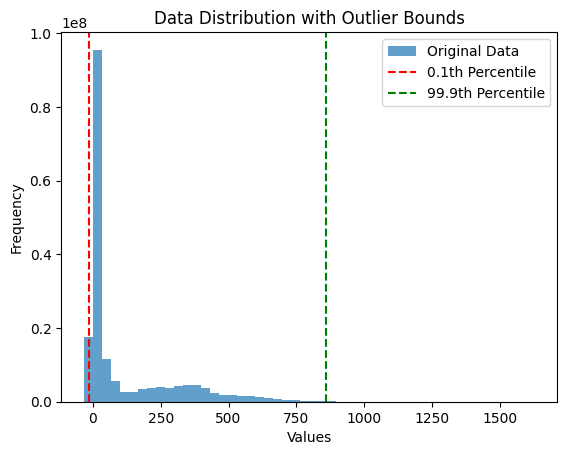

(np.float64(-16.28), np.float64(858.63))

In [11]:
all_intensities = np.concatenate(data['Intensities'])
analyze_outliers(all_intensities, 
                0.1, 
                99.9)

In [12]:
def analyze_min_max_outliers(max_values, min_values, lower_percentile, upper_percentile):
    """
    Analyzes the max and min values from intensity vectors, identifies outliers, 
    and generates two histograms (one for max values, one for min values).
    """

    # Calculate percentile-based outlier bounds
    lower_bound_max = np.percentile(max_values, lower_percentile)
    upper_bound_max = np.percentile(max_values, upper_percentile)

    lower_bound_min = np.percentile(min_values, lower_percentile)
    upper_bound_min = np.percentile(min_values, upper_percentile)

    print(f"Max Values Range: {lower_bound_max} to {upper_bound_max}")
    print(f"Min Values Range: {lower_bound_min} to {upper_bound_min}")

    # Identify outliers
    max_outliers = max_values[(max_values < lower_bound_max) | (max_values > upper_bound_max)]
    min_outliers = min_values[(min_values < lower_bound_min) | (min_values > upper_bound_min)]

    print(f"Max Outliers: {max_outliers}")
    print(f"Min Outliers: {min_outliers}")

    # Plot histogram for max values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(max_values, bins=50, alpha=0.7, label="Max Values")
    plt.axvline(lower_bound_max, color='r', linestyle='--', label=f"{lower_percentile}th Percentile")
    plt.axvline(upper_bound_max, color='g', linestyle='--', label=f"{upper_percentile}th Percentile")
    plt.legend()
    plt.title("Distribution of Maximum Values")
    plt.xlabel("Max Values")
    plt.ylabel("Frequency")

    # Plot histogram for min values
    plt.subplot(1, 2, 2)
    plt.hist(min_values, bins=50, alpha=0.7, label="Min Values", color='orange')
    plt.axvline(lower_bound_min, color='r', linestyle='--', label=f"{lower_percentile}th Percentile")
    plt.axvline(upper_bound_min, color='g', linestyle='--', label=f"{upper_percentile}th Percentile")
    plt.legend()
    plt.title("Distribution of Minimum Values")
    plt.xlabel("Min Values")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    return (lower_bound_max, upper_bound_max), (lower_bound_min, upper_bound_min)

In [13]:
max_values = data['Intensities'].apply(lambda x: np.max(x))
min_values = data['Intensities'].apply(lambda x: np.min(x))

In [14]:
max_values.describe()

count    176961.000000
mean        611.264947
std         307.569197
min          20.690000
25%         356.200000
50%         730.800000
75%         797.490000
max        1629.490000
Name: Intensities, dtype: float64

In [15]:
min_values.describe()

count    176961.000000
mean        -20.480747
std           2.218171
min         -33.700000
25%         -21.700000
50%         -20.700000
75%         -18.700000
max         -11.700000
Name: Intensities, dtype: float64

In [16]:
max_values = np.array(max_values)
min_values = np.array(min_values)

Max Values Range: 86.02 to 1198.2
Min Values Range: -25.7 to -15.7
Max Outliers: [85.2  85.2  85.79 ... 57.96 20.91 81.96]
Min Outliers: [-14.7 -14.7 -26.7 ... -14.7 -14.7 -26.7]


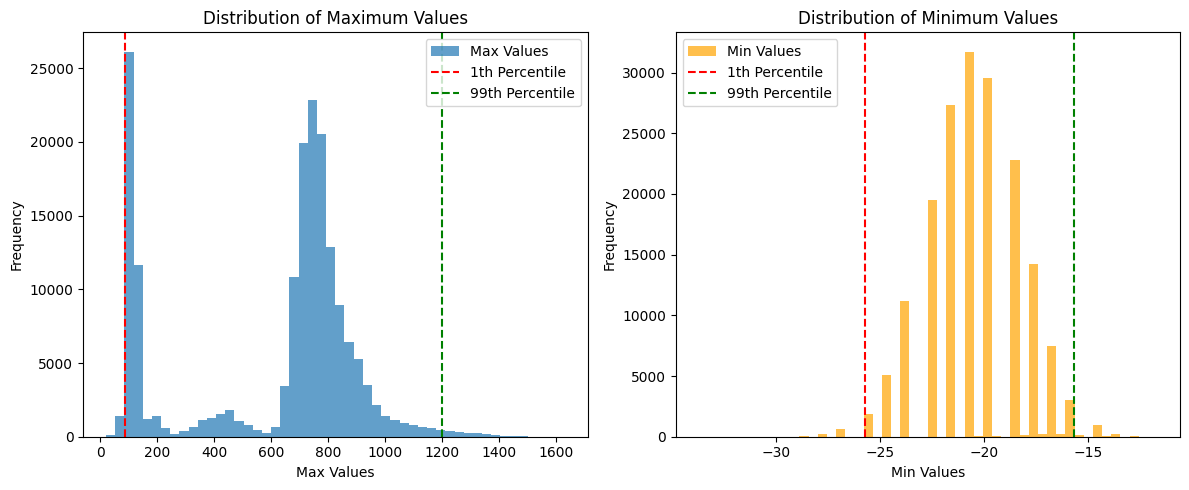

((np.float64(86.02), np.float64(1198.2)),
 (np.float64(-25.7), np.float64(-15.7)))

In [17]:
analyze_min_max_outliers(max_values, min_values, 1, 99)

In [36]:
def plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_min,
                                    threshold_max,
                                    label="Spectrogram of Intensities by Wavelength"):
    """
    Create and display a spectrogram-like plot with a horizontal line at a given intensity value.

    Parameters:
        wavelengths (numpy.ndarray): 1D array of wavelength values.
        intensities (numpy.ndarray): 2D array where each row corresponds to intensities for a wavelength.
        threshold_intensity (float): The intensity value where a horizontal line should be drawn.
        label (str): Title of the spectrogram.

    Returns:
        None: Displays the spectrogram.
    """
    all_wavelengths = np.tile(wavelengths, len(intensities))
    all_intensities = np.concatenate(intensities)

    wavelength_bins = np.linspace(min(wavelengths), max(wavelengths), len(wavelengths) + 1)
    intensity_bins = np.linspace(min(all_intensities), max(all_intensities), 100)

    histogram, x_edges, y_edges = np.histogram2d(all_wavelengths, all_intensities, bins=[wavelength_bins, intensity_bins])

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(x_edges, 
                   y_edges, 
                   histogram.T, 
                   shading='auto', 
                   cmap='viridis', 
                   norm=LogNorm(vmin=1, vmax=histogram.max()))
    plt.colorbar(label='Number of Occurrences (Log Scale)')
    plt.xlabel('Wavelengths')
    plt.ylabel('Intensities')
    plt.title(label)

    plt.axhline(y=threshold_min, 
                color='m', 
                linestyle='--', 
                linewidth=2, 
                label=f'Threshold: {threshold_min}')
    plt.axhline(y=threshold_max, 
                color='red', 
                linestyle='--', 
                linewidth=2, 
                label=f'Threshold: {threshold_max}')
    plt.legend()

    plt.tight_layout()
    plt.show()

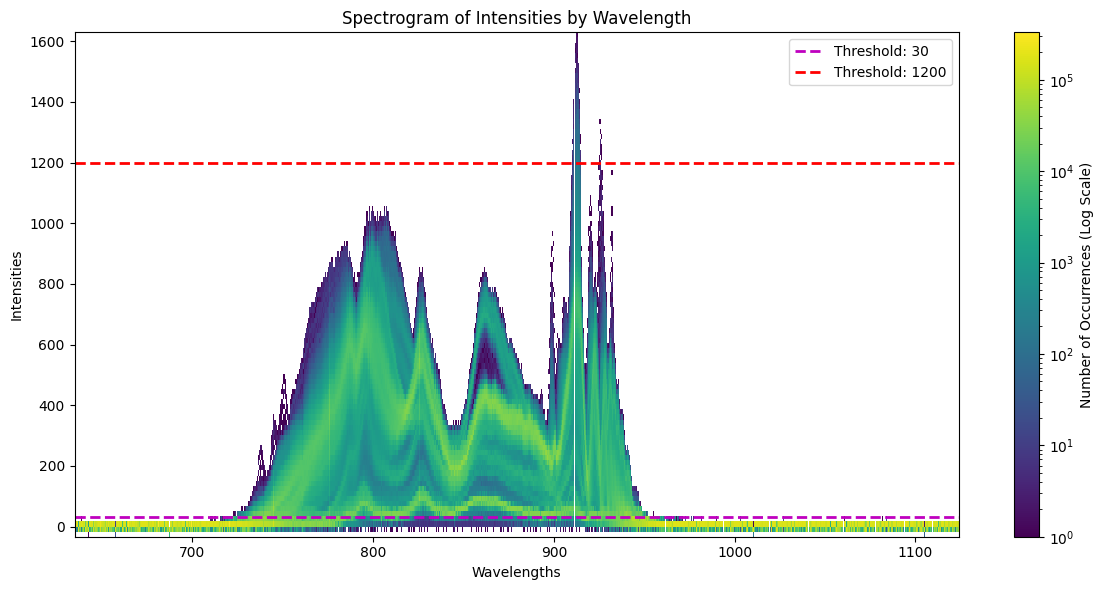

In [37]:
intensities = data['Intensities']
plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_min=30,
                                    threshold_max=1200,
                                    label="Spectrogram of Intensities by Wavelength")

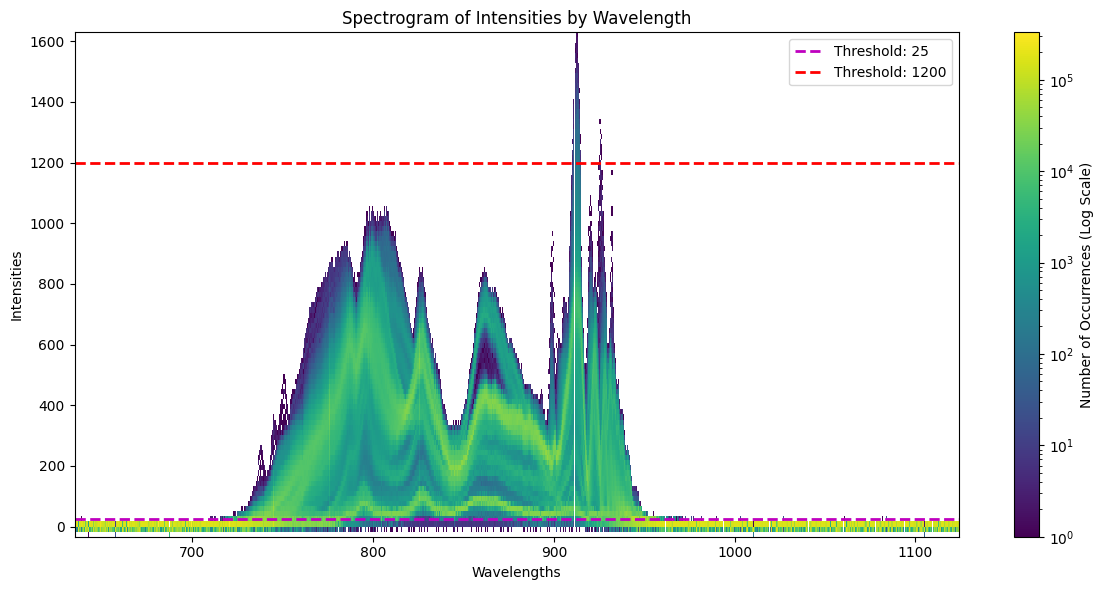

In [38]:
intensities = data['Intensities']
plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_min=25,
                                    threshold_max=1200,
                                    label="Spectrogram of Intensities by Wavelength")

In [39]:
lower_bound_int = 30
upper_bound_int = 1200

## Normalization

In [40]:
data['Intensities'] = data['Intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
0,2024-11-21 10:14:13.954589367,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.79,0.11
1,2024-11-21 10:14:14.964668751,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.85,0.21
2,2024-11-21 10:14:16.018996716,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.06,7.30,0.27
3,2024-11-21 10:14:17.021016121,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.04,7.00,0.37
4,2024-11-21 10:14:18.027237415,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.10,7.41,0.32


In [41]:
data_test['Intensities'] = data_test['Intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data_test.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
0,2024-12-04 11:15:07.656572819,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0.1299,-0.7678,0.2274,-1.4864,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.30,8.04,0.06
1,2024-12-04 11:15:08.714265823,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0.1299,-0.7678,0.2274,-1.4563,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.24,7.76,0.11
2,2024-12-04 11:15:09.717498302,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.14,8.08,0.26
3,2024-12-04 11:15:10.772176743,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,-0.04,8.14,0.31
4,2024-12-04 11:15:11.881540775,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0.1299,-0.7678,0.2061,-1.4203,-1.0,-1.0,-0.351,-2.2155,-0.6271,1.7599,0.02,7.82,0.27


In [42]:
data_val['Intensities'] = data_val['Intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data_val.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
399,2024-12-04 15:38:53.462969780,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.6222,0.1626,-0.3527,-1.4393,-1.0,-1.0,-2.4674,-0.6064,-2.4647,1.0295,-0.22,6.62,0.00
232,2024-12-04 15:38:56.587590218,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.6222,0.1626,-0.3652,-1.4122,-1.0,-1.0,-2.4575,-0.6250,-2.4893,1.0995,1.03,42.01,0.49
1857,2024-12-04 15:39:01.867878437,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.6222,0.1626,-0.3439,-1.3689,-1.0,-1.0,-2.4846,-0.6250,-2.5599,1.0882,3.72,43.66,0.46
803,2024-12-04 15:39:03.978704929,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.6222,0.1626,-0.3439,-1.3279,0.0,-1.0,-2.4846,-0.6250,-2.5599,1.0882,4.80,46.92,0.93
1474,2024-12-04 15:39:06.037250996,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.6222,0.1626,-0.3439,-1.3690,-1.0,-1.0,-2.4717,-0.6250,-2.5115,1.0882,5.82,45.66,0.38


In [43]:
all_intensities = np.concatenate(data['Intensities'].values)

min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -1.0
Maximum Intensity: 1.0
Mean Intensity: -0.8388487786530234
Median Intensity: -1.0
Variance of Intensities: 0.08196924710283601


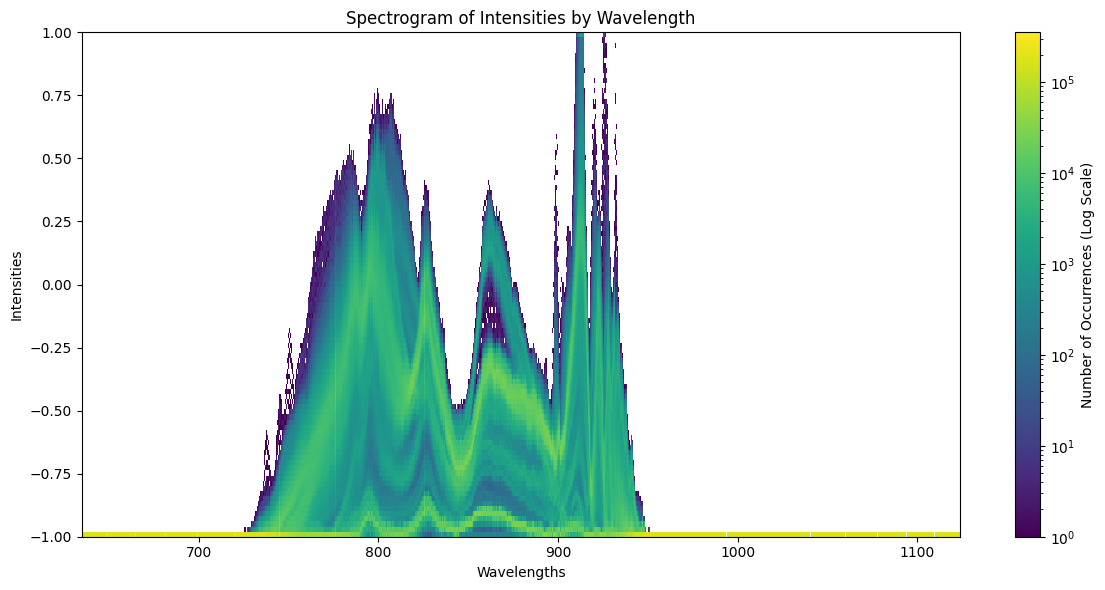

In [44]:
intensities = data['Intensities']

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength")

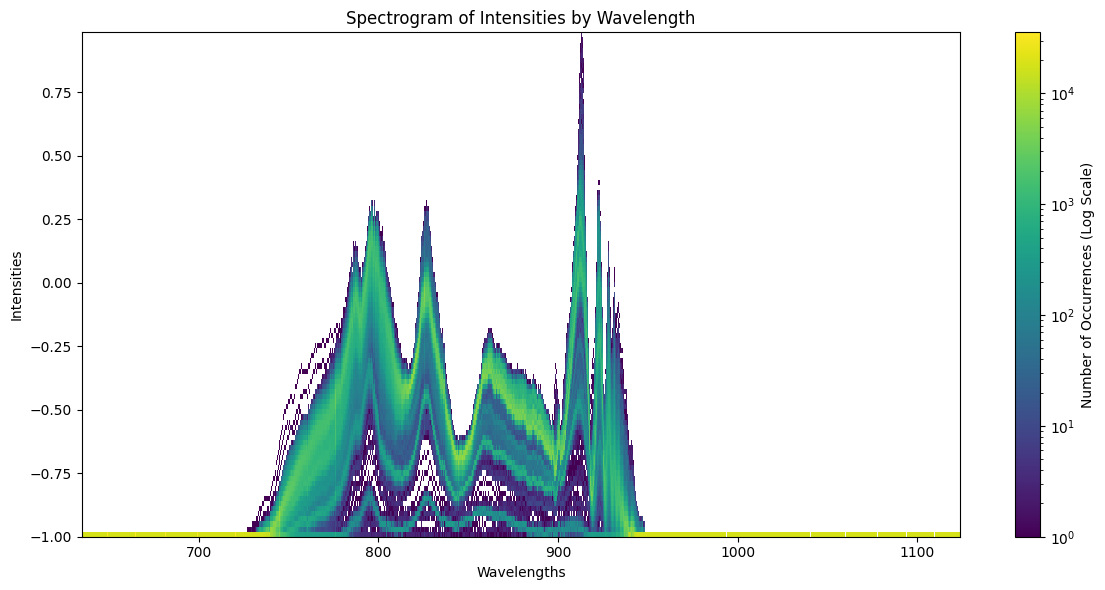

In [46]:
intensities_test = data_test['Intensities']

create_spectrogram(wavelengths, intensities_test, label="Spectrogram of Intensities by Wavelength")

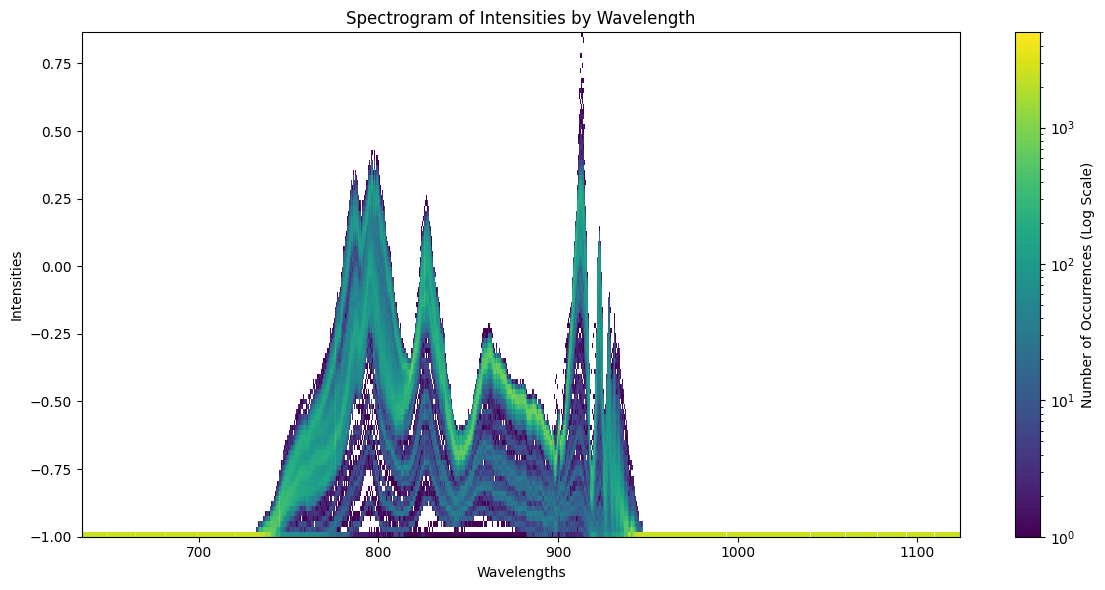

In [47]:
intensities_val = data_val['Intensities']

create_spectrogram(wavelengths, intensities_val, label="Spectrogram of Intensities by Wavelength")

## Filter data

In [48]:
data.head()

,Time,Intensities,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff
0,2024-11-21 10:14:13.954589367,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.79,0.11
1,2024-11-21 10:14:14.964668751,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.85,0.21
2,2024-11-21 10:14:16.018996716,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.06,7.30,0.27
3,2024-11-21 10:14:17.021016121,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.04,7.00,0.37
4,2024-11-21 10:14:18.027237415,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.10,7.41,0.32


In [49]:
len(data[data["Intensities"].apply(lambda x: all(val == x[0] for val in x))])

7

In [50]:
len(data[~data["Intensities"].apply(lambda x: all(val == x[0] for val in x))])

176954

In [51]:
data = data[~data["Intensities"].apply(lambda x: all(val == x[0] for val in x))]

In [52]:
len(data_test[data_test["Intensities"].apply(lambda x: all(val == x[0] for val in x))])

1

In [53]:
data_test = data_test[~data_test["Intensities"].apply(lambda x: all(val == x[0] for val in x))]

In [54]:
len(data_val[data_val["Intensities"].apply(lambda x: all(val == x[0] for val in x))])

1

In [55]:
data_val = data_val[~data_val["Intensities"].apply(lambda x: all(val == x[0] for val in x))]

## Save files

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176954 entries, 0 to 176960
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Time                      176954 non-null  datetime64[ns]
 1   Intensities               176954 non-null  object        
 2   L1-PL3-PZM52:Setpoint     176954 non-null  float64       
 3   L1-PL3-PZM53:Setpoint     176954 non-null  float64       
 4   L1-PL3-PZM56:Setpoint     176954 non-null  float64       
 5   L1-PL3-PZM57:Setpoint     176954 non-null  float64       
 6   L1-PL3-PZM58:Setpoint     176954 non-null  float64       
 7   L1-PL3-PZM59:Setpoint     176954 non-null  float64       
 8   L1-PL4-PZM66:Setpoint     176954 non-null  float64       
 9   L1-PL4-PZM67:Setpoint     176954 non-null  float64       
 10  L1-PL4-PZM68:Setpoint     176954 non-null  float64       
 11  L1-PL4-PZM69:Setpoint     176954 non-null  float64       
 12  L1-INJ-

In [57]:
parameters_columns = [
    "L1-PL3-PZM52:Setpoint", "L1-PL3-PZM53:Setpoint", "L1-PL3-PZM56:Setpoint",
    "L1-PL3-PZM57:Setpoint", "L1-PL3-PZM58:Setpoint", "L1-PL3-PZM59:Setpoint",
    "L1-PL4-PZM66:Setpoint", "L1-PL4-PZM67:Setpoint", "L1-PL4-PZM68:Setpoint",
    "L1-PL4-PZM69:Setpoint", "L1-INJ-PM70:VAL_CAL", "L1-OPA3-5_2-PM98:VAL_CAL",
    "L1-INJ-PM70:VAL_CAL_diff"
]

data["cond_vector"] = data[parameters_columns].values.tolist()
data.drop(parameters_columns, axis=1, inplace=True)

data.head()

,Time,Intensities,cond_vector
0,2024-11-21 10:14:13.954589367,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
1,2024-11-21 10:14:14.964668751,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
2,2024-11-21 10:14:16.018996716,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
3,2024-11-21 10:14:17.021016121,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
4,2024-11-21 10:14:18.027237415,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."


In [58]:
data_test["cond_vector"] = data_test[parameters_columns].values.tolist()
data_test.drop(parameters_columns, axis=1, inplace=True)

data_test.head()

,Time,Intensities,cond_vector
0,2024-12-04 11:15:07.656572819,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.1299, -0.7678, 0.2274, -1.4864, -1.0, -1.0,..."
1,2024-12-04 11:15:08.714265823,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.1299, -0.7678, 0.2274, -1.4563, -1.0, -1.0,..."
2,2024-12-04 11:15:09.717498302,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.1299, -0.7678, 0.2165, -1.4203, -1.0, -1.0,..."
3,2024-12-04 11:15:10.772176743,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.1299, -0.7678, 0.2165, -1.4203, -1.0, -1.0,..."
4,2024-12-04 11:15:11.881540775,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.1299, -0.7678, 0.2061, -1.4203, -1.0, -1.0,..."


In [59]:
data_val["cond_vector"] = data_val[parameters_columns].values.tolist()
data_val.drop(parameters_columns, axis=1, inplace=True)

data_val.head()

,Time,Intensities,cond_vector
399,2024-12-04 15:38:53.462969780,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.6222, 0.1626, -0.3527, -1.4393, -1.0, -1.0..."
232,2024-12-04 15:38:56.587590218,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.6222, 0.1626, -0.3652, -1.4122, -1.0, -1.0..."
1857,2024-12-04 15:39:01.867878437,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.6222, 0.1626, -0.3439, -1.3689, -1.0, -1.0..."
803,2024-12-04 15:39:03.978704929,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.6222, 0.1626, -0.3439, -1.3279, 0.0, -1.0,..."
1474,2024-12-04 15:39:06.037250996,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.6222, 0.1626, -0.3439, -1.369, -1.0, -1.0,..."


In [60]:
data = data.rename(columns={"Time": "time", "Intensities": "intensities"})
data_test = data_test.rename(columns={"Time": "time", "Intensities": "intensities"})
data_val = data_val.rename(columns={"Time": "time", "Intensities": "intensities"})

In [61]:
data['intensities'] = data['intensities'].apply(lambda x: ','.join(map(str, x)))

In [62]:
data_test['intensities'] = data_test['intensities'].apply(lambda x: ','.join(map(str, x)))
data_val['intensities'] = data_val['intensities'].apply(lambda x: ','.join(map(str, x)))

In [63]:
data.to_csv('../data/train_data_stg7_norm.csv', index=False)
data_test.to_csv('../data/test_data_stg7_norm.csv', index=False)
data_val.to_csv('../data/val_data_stg7_norm.csv', index=False)

In [64]:
data.head()

,time,intensities,cond_vector
0,2024-11-21 10:14:13.954589367,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
1,2024-11-21 10:14:14.964668751,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
2,2024-11-21 10:14:16.018996716,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
3,2024-11-21 10:14:17.021016121,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
4,2024-11-21 10:14:18.027237415,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."


In [65]:
data_test.head()

,time,intensities,cond_vector
0,2024-12-04 11:15:07.656572819,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[0.1299, -0.7678, 0.2274, -1.4864, -1.0, -1.0,..."
1,2024-12-04 11:15:08.714265823,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[0.1299, -0.7678, 0.2274, -1.4563, -1.0, -1.0,..."
2,2024-12-04 11:15:09.717498302,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[0.1299, -0.7678, 0.2165, -1.4203, -1.0, -1.0,..."
3,2024-12-04 11:15:10.772176743,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[0.1299, -0.7678, 0.2165, -1.4203, -1.0, -1.0,..."
4,2024-12-04 11:15:11.881540775,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[0.1299, -0.7678, 0.2061, -1.4203, -1.0, -1.0,..."


In [66]:
data_val.head()

,time,intensities,cond_vector
399,2024-12-04 15:38:53.462969780,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.6222, 0.1626, -0.3527, -1.4393, -1.0, -1.0..."
232,2024-12-04 15:38:56.587590218,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.6222, 0.1626, -0.3652, -1.4122, -1.0, -1.0..."
1857,2024-12-04 15:39:01.867878437,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.6222, 0.1626, -0.3439, -1.3689, -1.0, -1.0..."
803,2024-12-04 15:39:03.978704929,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.6222, 0.1626, -0.3439, -1.3279, 0.0, -1.0,..."
1474,2024-12-04 15:39:06.037250996,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.6222, 0.1626, -0.3439, -1.369, -1.0, -1.0,..."
